In [1]:
### CONVERGENCEPLOTS.IPYNB -- plots of twin star parameter constraints as a function of number of observations

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

sns.set_palette('Set1',color_codes=True)

EOSDIR = './etc/'
PLTDIR = './plt/'
RESDIR = './dat/'

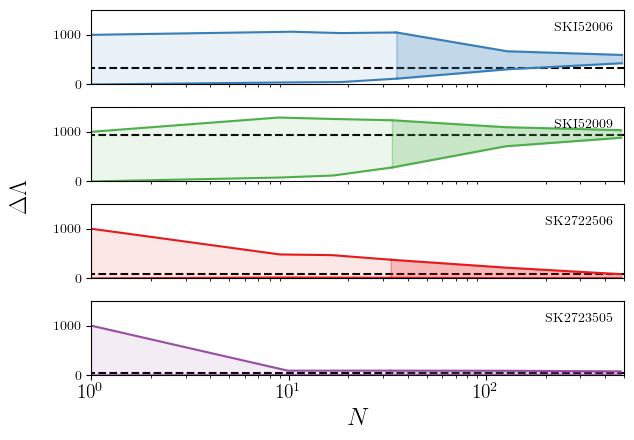

In [3]:
eoss = ['SKI52006','SKI52009','SK2722506','SK2723505']#,'SKI5','SK272']
colors = [sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0],sns.color_palette()[3],'k','grey']

cl = 0.90
eos_dict = {'SKI52006': 'SKI5_2006', 'SKI52009': 'SKI5_2009', 'SK2722506': 'SK272_2506', 'SK2723505': 'SK272_3505', 'SK272': 'SK272', 'SKI5': 'SKI5'}
pops = ['v0','v2','v3','v4', 'v5','v6','v7','v8','v9']

fig, axs = plt.subplots(4, 1,figsize=(6,4.5))

for i,eos in enumerate(eoss):
    
    results_path = RESDIR+'unif_BNS_{0}'.format(eos)
    
    alldDeltaL90s_ub = [1000.]
    alldDeltaL90s_lb = [0.]
    allevents = [1.]

    for scenario in ['O5','O5y2']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['DeltaL'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['DeltaL'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [np.mean(events)]

    for scenario in ['3Gd1','3Gw1','3Gm1']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['DeltaL'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['DeltaL'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [allevents[2]+np.mean(events)]

    params = np.genfromtxt(results_path+pop+'/{0}_twinstarparameters.csv'.format(eos),names=True,delimiter=',',dtype=None)

    axs[i].plot(allevents[:4],alldDeltaL90s_ub[:4],alpha=1,color=colors[i])
    axs[i].plot(allevents[:4],alldDeltaL90s_lb[:4],alpha=1,color=colors[i])
    
    axs[i].plot(allevents[3:],alldDeltaL90s_ub[3:],alpha=1,color=colors[i])
    axs[i].plot(allevents[3:],alldDeltaL90s_lb[3:],alpha=1,color=colors[i])
    
    axs[i].fill_between(allevents[:4],alldDeltaL90s_ub[:4],alldDeltaL90s_lb[:4],alpha=0.1,color=colors[i])
    axs[i].fill_between(allevents[3:],alldDeltaL90s_ub[3:],alldDeltaL90s_lb[3:],alpha=0.3,color=colors[i])
    axs[i].plot([0.,500.],[params['DeltaL'],params['DeltaL']],color='k',ls='--',label=eos,zorder=-1)
    
    axs[i].set_xscale('log')
    axs[i].set_xlim(1.,500.)
    axs[i].set_ylim(0.,1500.)
    if i != len(eoss)-1: axs[i].set_xticks([])
    axs[i].legend(frameon=False,handlelength=0,loc='upper right')

fig.text(-0.03, 0.55, r'$\Delta\Lambda$', size=18, ha='center', va='center', rotation='vertical')    
axs[i].set_xlabel(r'$N$',size=18)
plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

fig.tight_layout()    
plt.savefig(PLTDIR+'DeltaL_convergence.png',bbox_inches="tight")

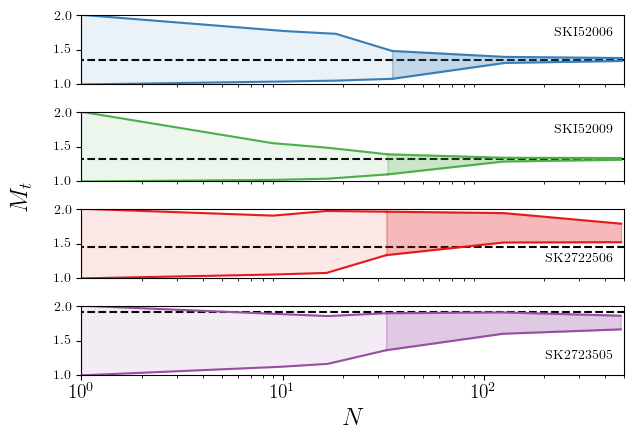

In [5]:
eoss = ['SKI52006','SKI52009','SK2722506','SK2723505']#,'SKI5','SK272']
colors = [sns.color_palette()[1],sns.color_palette()[2],sns.color_palette()[0],sns.color_palette()[3],'k','grey']

cl = 0.90
eos_dict = {'SKI52006': 'SKI5_2006', 'SKI52009': 'SKI5_2009', 'SK2722506': 'SK272_2506', 'SK2723505': 'SK272_3505', 'SK272': 'SK272', 'SKI5': 'SKI5'}
pops = ['v0','v2','v3','v4', 'v5','v6','v7','v8','v9']

fig, axs = plt.subplots(4, 1,figsize=(6,4.5))

for i,eos in enumerate(eoss):
    
    results_path = RESDIR+'unif_BNS_{0}'.format(eos)
    
    alldDeltaL90s_ub = [2.]
    alldDeltaL90s_lb = [1.]
    allevents = [1.]

    for scenario in ['O5','O5y2']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['Mt'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['Mt'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/O5_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [np.mean(events)]

    for scenario in ['3Gd1','3Gw1','3Gm1']:

        dDeltaL90s_ub = []
        dDeltaL90s_lb = []
        events = []

        for pop in pops:

            dat = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_recovery-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            dDeltaL90_ub = np.quantile(dat['Mt'],1.-(1.-cl)/2.)
            dDeltaL90_lb = np.quantile(dat['Mt'],(1.-cl)/2.)

            det = np.genfromtxt(results_path+pop+'/3G_unif_BNS_{1}_detected-{0}.csv'.format(scenario,eos),names=True,delimiter=',',dtype=None)
            event = len(det['mc'])

            dDeltaL90s_ub += [dDeltaL90_ub]
            dDeltaL90s_lb += [dDeltaL90_lb]
            events += [event]

        alldDeltaL90s_ub += [np.mean(dDeltaL90s_ub)]
        alldDeltaL90s_lb += [np.mean(dDeltaL90s_lb)]
        allevents += [allevents[2]+np.mean(events)]

    params = np.genfromtxt(results_path+pop+'/{0}_twinstarparameters.csv'.format(eos),names=True,delimiter=',',dtype=None)

    axs[i].plot(allevents[:4],alldDeltaL90s_ub[:4],alpha=1,color=colors[i])
    axs[i].plot(allevents[:4],alldDeltaL90s_lb[:4],alpha=1,color=colors[i])
    
    axs[i].plot(allevents[3:],alldDeltaL90s_ub[3:],alpha=1,color=colors[i])
    axs[i].plot(allevents[3:],alldDeltaL90s_lb[3:],alpha=1,color=colors[i])
    
    axs[i].fill_between(allevents[:4],alldDeltaL90s_ub[:4],alldDeltaL90s_lb[:4],alpha=0.1,color=colors[i])
    axs[i].fill_between(allevents[3:],alldDeltaL90s_ub[3:],alldDeltaL90s_lb[3:],alpha=0.3,color=colors[i])
    axs[i].plot([0.,500.],[params['Mt'],params['Mt']],color='k',ls='--',label=eos,zorder=-1)
    
    axs[i].set_xscale('log')
    axs[i].set_xlim(1.,500.)
    axs[i].set_ylim(1.,2.)
    if i != len(eoss)-1: axs[i].set_xticks([])
    axs[i].set_yticks([1.,1.5,2.])
    if i < 2: axs[i].legend(frameon=False,handlelength=0,loc='upper right')
    else: axs[i].legend(frameon=False,handlelength=0,loc='lower right')

fig.text(-0.03, 0.55, r'$M_t$', size=18, ha='center', va='center', rotation='vertical')    
axs[i].set_xlabel(r'$N$',size=18)
plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

fig.tight_layout()    
plt.savefig(PLTDIR+'Mt_convergence.png',bbox_inches="tight")